In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## The normal curve ##

In [8]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x))/np.std(x)

In [3]:
#Net Gain in Roulette:
red_winnings = np.append(1*np.ones(18), -1*np.ones(20))
red = pd.DataFrame({'Winnings on Red': red_winnings})

In [4]:
red

,Winnings on Red
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


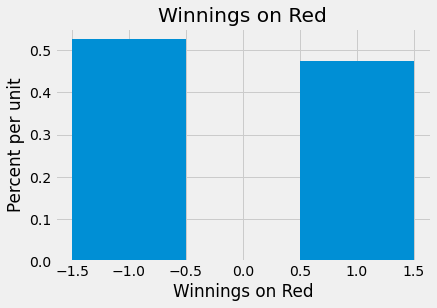

In [5]:
red.hist(bins = np.arange(-1.5, 1.6, 1), density=True)
plt.ylabel("Percent per unit")
plt.xlabel('Winnings on Red')
plt.show()

In [6]:
18/38

0.47368421052631576

In [7]:
num_bets = 100

net_gains = np.array([])

for i in np.arange(10000):
    spins = red.sample(num_bets, replace=True)
    new_net_gain = sum(spins['Winnings on Red'])
    net_gains = np.append(net_gains, new_net_gain)
 

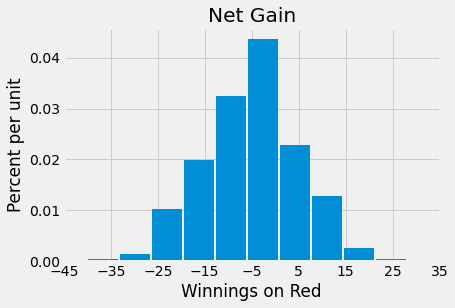

In [8]:
pd.DataFrame({'Net Gain': net_gains}).hist(density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Winnings on Red')
plt.xticks(np.arange(-45, 36, 10));
plt.show()

That’s a roughly bell shaped histogram, even though the distribution we are drawing from is nowhere near bell shaped.

In [9]:
np.average(net_gains)

-5.3114

## Central Limit Theorem and Simulating Sample Mean ##

In [3]:
united = pd.read_csv('united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


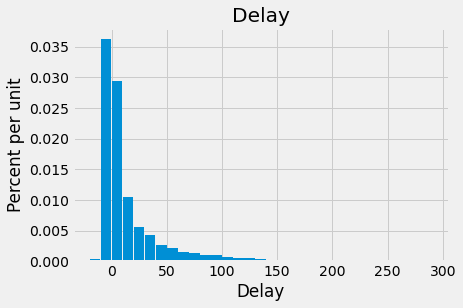

In [4]:
united.hist('Delay', bins = np.arange(-20, 300, 10), density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Delay')
plt.show()

In [9]:
delays = united['Delay']
mean_delay = np.mean(delays)
sd_delay = np.std(delays)

mean_delay, sd_delay

(16.658155515370705, 39.48019985160957)

In [10]:
united['Delay in Standard Units']= standard_units(delays)
united.sort_values(by='Delay', ascending=False)

,Date,Flight Number,Destination,Delay,Delay in Standard Units
3140,6/21/15,1964,SEA,580,14.268971
3154,6/22/15,300,HNL,537,13.179818
3069,6/21/15,1149,IAD,508,12.445272
2888,6/20/15,353,ORD,505,12.369285
12627,8/23/15,1589,ORD,458,11.178815
...,...,...,...,...,...
13568,8/30/15,602,SAN,-13,-0.751216
12503,8/22/15,1723,KOA,-14,-0.776545
2900,6/20/15,464,PDX,-15,-0.801874
12565,8/23/15,587,PDX,-16,-0.827203


What this shows is that it is possible for data to be many SDs above average (and for flights to be delayed by almost 10 hours). The highest value of delay is more than 14 in standard units. 

However, the proportion of these extreme values is small, and Chebychev’s bounds still hold true. For example, let us calculate the percent of delay times that are in the range “average ±3 SDs”. This is the same as the percent of times for which the standard units are in the range (-3, 3). That is about 98%, as computed below, consistent with Chebychev’s bound of “at least 89%”.

In [11]:
chosen = united[(united['Delay in Standard Units'] >=-3) &  (united['Delay in Standard Units'] <=3) ]
len(chosen)/len(united)

0.9790235081374322

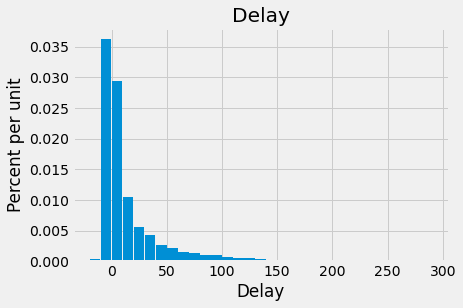

In [12]:
united.hist('Delay', bins = np.arange(-20, 300, 10), density=True, rwidth=0.95)
plt.ylabel("Percent per unit")
plt.xlabel('Delay')
plt.show()

In [14]:
sample_size = 400

means = np.array([])

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size,  replace=True)
    sample_mean = np.mean(sampled_flights['Delay'])
    means = np.append(means, sample_mean)

Text(0, 0.5, 'Percent per unit')

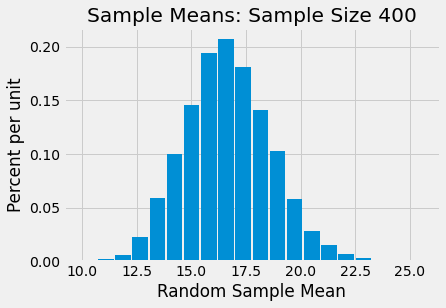

In [15]:
pd.DataFrame({'Sample Mean': means}).hist(bins = 20, density=True, rwidth=0.90)
plt.title('Sample Means: Sample Size ' + str(sample_size))
plt.xlabel('Random Sample Mean')
plt.ylabel("Percent per unit")

Once again, we see a rough bell shape, even though we are drawing from a very skewed distribution. The bell is centered somewhere between 16 ad 17, as we expect.

The reason why the bell shape appears in such settings is a remarkable result of probability theory called the Central Limit Theorem.

The Central Limit Theorem says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

